<h2>Understanding the data<h2>

In [48]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Students Performance Dataset.csv')
data = df.copy()
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [49]:
data.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.048400,75.356076,70.701924,69.546552,74.956320,74.836214,49.963720,74.78305,71.652097,17.521140,5.507200,6.514420
std,1.989786,14.392716,17.436325,17.108996,14.404287,14.423848,28.989785,14.54243,7.230097,7.193035,2.886662,1.446155
min,18.000000,50.010000,40.000000,40.010000,50.000000,50.000000,0.000000,50.00000,50.602000,5.000000,1.000000,4.000000
25%,19.000000,62.945000,55.707500,54.697500,62.340000,62.357500,25.075000,61.97000,66.533875,11.500000,3.000000,5.300000
50%,21.000000,75.670000,70.860000,69.485000,75.090000,74.905000,49.600000,74.54000,71.696250,17.400000,6.000000,6.500000
75%,23.000000,87.862500,85.760000,83.922500,87.352500,87.292500,75.500000,87.63000,76.711625,23.700000,8.000000,7.800000
max,24.000000,100.000000,99.990000,99.980000,99.990000,99.990000,100.000000,100.00000,95.091500,30.000000,10.000000,9.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [51]:
data.corr("pearson",numeric_only=True)

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
Age,1.000000,0.015936,-0.007710,-0.003700,0.007902,0.013998,-0.007132,0.006628,0.002746,-0.002313,0.013800,0.015510
Attendance (%),0.015936,1.000000,0.007881,-0.009300,-0.003600,-0.027840,0.009051,-0.011101,-0.014165,0.011200,0.003838,0.003493
Midterm_Score,-0.007710,0.007881,1.000000,-0.004638,-0.025153,-0.013974,-0.017434,-0.024138,0.330636,0.009096,0.035220,0.015053
Final_Score,-0.003700,-0.009300,-0.004638,1.000000,0.013635,0.004714,-0.011764,-0.006563,0.588608,0.004645,-0.004479,0.011281
Assignments_Avg,0.007902,-0.003600,-0.025153,0.013635,1.000000,0.000662,0.019216,0.024666,0.316676,-0.011738,-0.002671,0.016998
Quizzes_Avg,0.013998,-0.027840,-0.013974,0.004714,0.000662,1.000000,0.013216,0.002909,0.201833,-0.025146,0.006825,0.018356
Participation_Score,-0.007132,0.009051,-0.017434,-0.011764,0.019216,0.013216,1.000000,-0.013334,0.187547,-0.012782,0.016859,-0.003790
Projects_Score,0.006628,-0.011101,-0.024138,-0.006563,0.024666,0.002909,-0.013334,1.000000,0.596076,-0.002586,-0.000497,-0.002078
Total_Score,0.002746,-0.014165,0.330636,0.588608,0.316676,0.201833,0.187547,0.596076,1.000000,-0.006609,0.013734,0.018847
Study_Hours_per_Week,-0.002313,0.011200,0.009096,0.004645,-0.011738,-0.025146,-0.012782,-0.002586,-0.006609,1.000000,0.011673,0.002522


<h2>Analyzing the features 'Attendance' and 'Study_Hours_per_Weak' with respect to 'Total_Score'<h2>

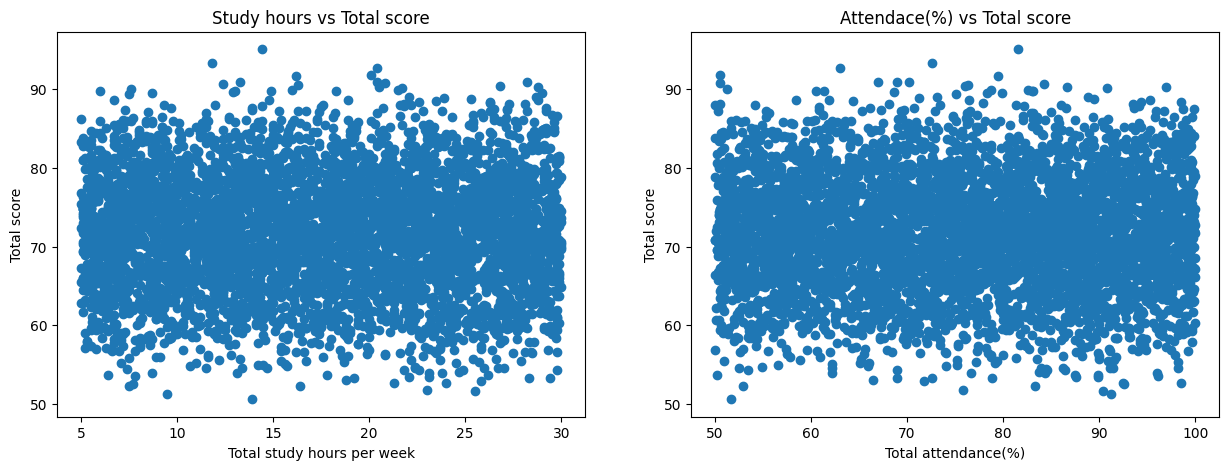

In [52]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(data['Study_Hours_per_Week'], data['Total_Score'])
plt.title('Study hours vs Total score')
plt.xlabel('Total study hours per week')
plt.ylabel('Total score')

plt.subplot(1,2,2,)
plt.scatter(data['Attendance (%)'], data['Total_Score'])
plt.title('Attendace(%) vs Total score')
plt.xlabel('Total attendance(%)')
plt.ylabel('Total score')

plt.subplots_adjust(wspace=0.2)
plt.show()

<h2>Trying to create model on 'Attendance' and 'Study_Hours_per_Weak'<h2>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X1 = data[['Attendance (%)', 'Study_Hours_per_Week']]
y1 = data['Total_Score']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
for col, imp in zip(X1.columns, importances):
    print(f"{col}: {imp:.4f}")


Final_Score: 0.5884
Projects_Score: 0.4116


In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = rf.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: -0.13413396593370774
MAE: 6.327564904166666
RMSE: 7.789374705262667


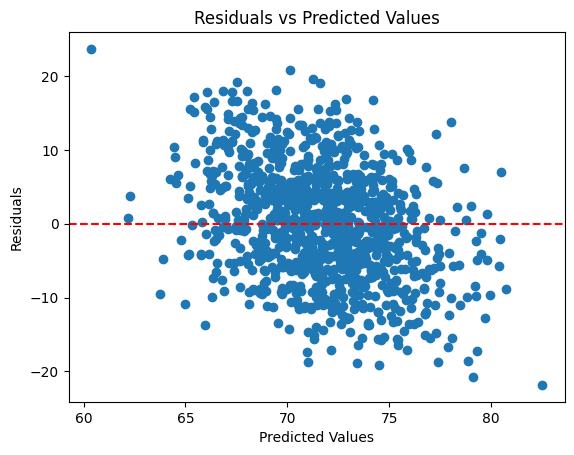

In [55]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [56]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
print("Dummy R²:", r2_score(y_test, dummy.predict(X_test)))

Dummy R²: -0.0003018121233560045


<h2>Building a new regression model on the features 'Final_Score' and 'Project_Score' to predict 'Total_Score'<h2>

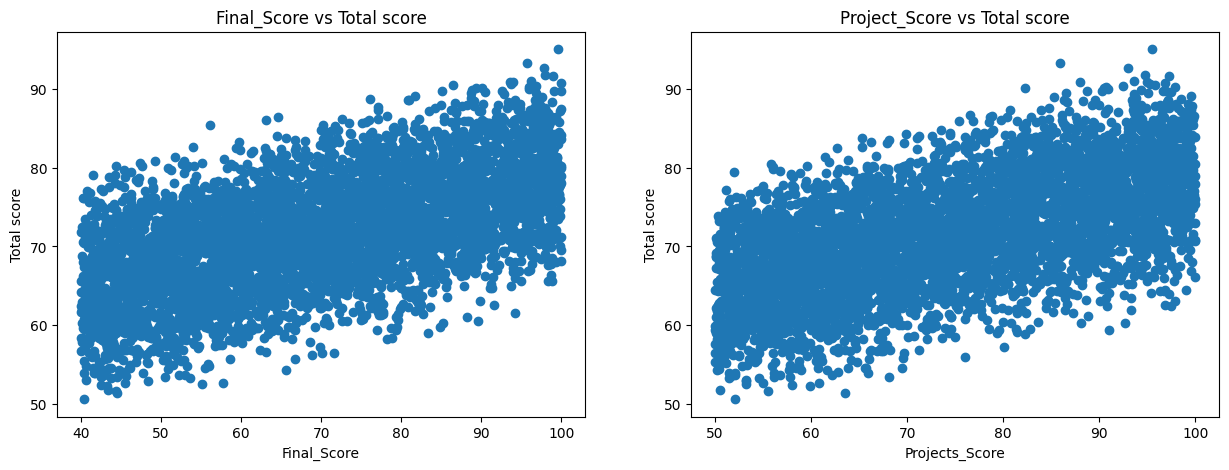

In [57]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(data['Final_Score'], data['Total_Score'])
plt.title('Final_Score vs Total score')
plt.xlabel('Final_Score')
plt.ylabel('Total score')

plt.subplot(1,2,2)
plt.scatter(data['Projects_Score'], data['Total_Score'])
plt.title('Project_Score vs Total score')
plt.xlabel('Projects_Score')
plt.ylabel('Total score')

plt.subplots_adjust(wspace=0.2)
plt.show()

<h2>Fitting Data to simple Linear Regression<h2>

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X2 = data[['Final_Score', 'Projects_Score']]
y2 = data['Total_Score']

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
r2 = r2_score(y_test, y_predicted)
rmse = sklearn.metrics.mean_squared_error(y_test, y_predicted)
print(f'Model r2 score is{r2}')
print(f'Model rmse score is {rmse}')

Model r2 score is0.7372942183190694
Model rmse score is 14.05434031931254


<h2>Checking the robustness of the Linear Regression using 5-Fold CV<h2>

In [59]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
cv_r2 = cross_val_score(model, X2, y2, cv=5, scoring="r2")
print("LinearRegression CV R² mean:", cv_r2.mean())
cv_rmse = -cross_val_score(model, X2, y2, cv=5, scoring="neg_root_mean_squared_error")
print("LR CV RMSE mean:", cv_rmse.mean())

LinearRegression CV R² mean: 0.7056662281176111
LR CV RMSE mean: 3.919896833818504


<h2>Using Ridge regularization to enhance accuracy and the model ability to explain more variance of the data<h2>

In [60]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)

ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("Ridge R²:", ridge.score(X_test, y_test))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

Ridge R²: 0.7372942192434884
Ridge RMSE: 3.748911878113114


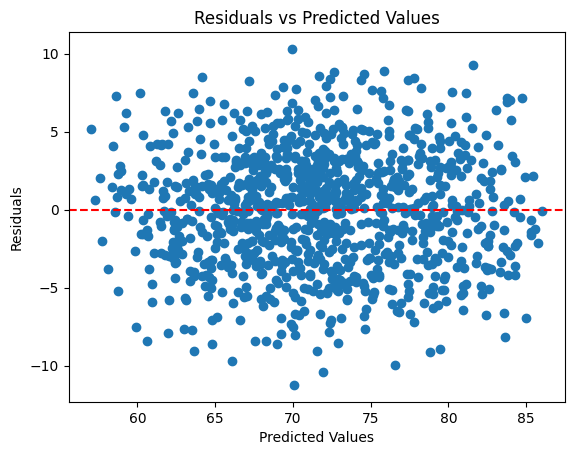

In [61]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

<h2>Checking the robustness of the Regularised Linear Regression model using 5-Fold CV<h2>

In [ ]:
ridge = Ridge(alpha=1.0)

# 5-fold CV with R²
cv_r2 = cross_val_score(ridge, X2, y2, cv=5, scoring="r2")
print("Ridge CV R² mean:", cv_r2.mean())
print("Ridge CV RMSE mean:", cv_rmse.mean())


Ridge CV R² mean: 0.7056662294138476
Ridge CV RMSE mean: 3.919896833818504
